### <span style = 'color:grey'> Introduction: </span> Glasses detection plays an important role in face recognition and soft biometrices for person identification. However, automatic glasses detection is still a challenging problem under real application scenarios, because face variations, light conditions, and self-occlusion, have significant influence on its performance.

### <span style = 'color:red'>Objective</span>: Create a deep learning algorithm that can diffrentiate the people with eye glasses and without eye glasses on facial analysis 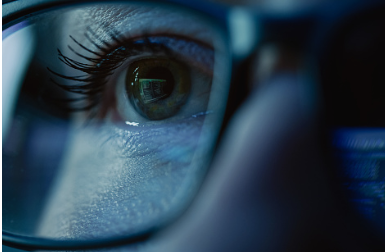 






#### For dataset <a href="https://drive.google.com/drive/folders/11MajaKB5T0cHRx5aXo9F72Un7hHqTCpA" title="Glasses dataset">   Click here</a>


**Outcomes of the Project**
- There are two diffrent classes in the dataset, Try to display the images of each class.
- Use CNN for model building.
- Explain the parameters in CNN and how it will alter the model building.
- Draw inference on Image augmentation.
- Draw inference on epochs and batch sizes.
- CNN model should be able to classify the people with and without glasses.

In [47]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [48]:
def display_images_from_directory(directory, n=5):
    fig, axs = plt.subplots(1, n, figsize=(20, 5))
    for i, filename in enumerate(os.listdir(directory)[:n]):
        img_path = os.path.join(directory, filename)
        img = load_img(img_path, target_size=(150, 150))
        axs[i].imshow(img)
        axs[i].axis('off')
    plt.show()


In [49]:
data_dir = r"C:\Users\krish\OneDrive\Desktop\glasses"

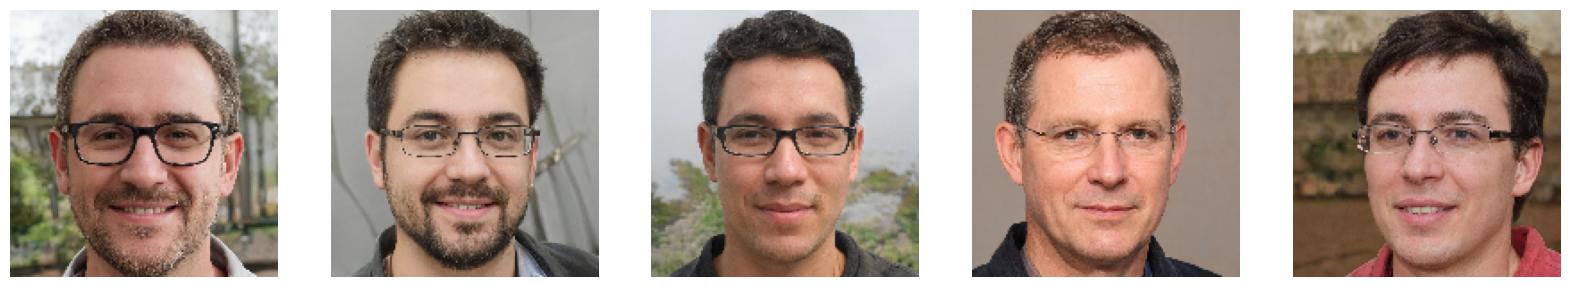

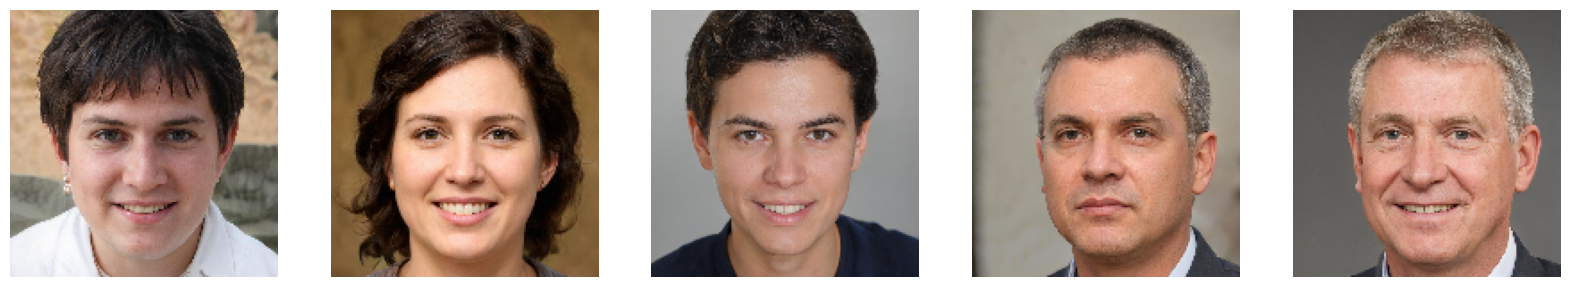

In [50]:
display_images_from_directory(r"C:\Users\krish\OneDrive\Desktop\glasses\glasses")

# Display images of people without glasses
display_images_from_directory(r"C:\Users\krish\OneDrive\Desktop\glasses\no_glasses")


In [51]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2)

In [52]:
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=50,
    class_mode='binary',
    subset='training'  # Use this subset for training
)

Found 69 images belonging to 2 classes.


In [53]:
if not os.path.exists(data_dir):
    raise FileNotFoundError(f"The specified path {data_dir} does not exist.")

In [54]:
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=50,
    class_mode='binary',
    subset='validation'  # Use this subset for validation
)

Found 17 images belonging to 2 classes.


In [55]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [56]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [60]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=32,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/32
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7000 - loss: 0.5937 - val_accuracy: 0.7059 - val_loss: 0.6059
Epoch 2/32
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step - accuracy: 0.6842 - loss: 0.5985 - val_accuracy: 0.7059 - val_loss: 0.5830
Epoch 3/32
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7059 - val_loss: 0.5848
Epoch 4/32
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6842 - loss: 0.5826 - val_accuracy: 0.7059 - val_loss: 0.5734
Epoch 5/32
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 792ms/step - accuracy: 0.7000 - loss: 0.5727 - val_accuracy: 0.7059 - val_loss: 0.5885
Epoch 6/32
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7059 - val_loss: 0.5843
Epoch 7/32
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6842 - loss: 0.5534 - val_accuracy: 0.7059 - val_loss: 0.6021
Epoch 8/32
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 786ms/step - accuracy: 0.7000 - loss: 0.5613 - val_accuracy: 0.7059 - va

In [61]:
test_loss, test_acc = model.evaluate(validation_generator)
print(f'Test accuracy: {test_acc:.2f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.7059 - loss: 0.5404
Test accuracy: 0.71


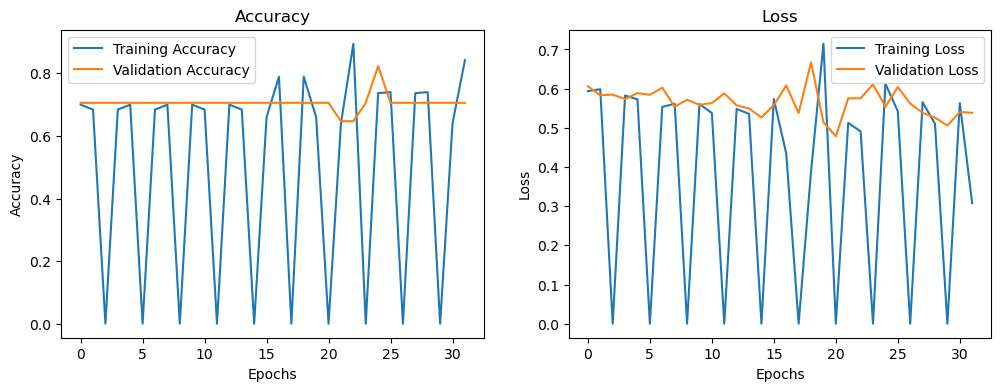

In [62]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting the loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Explain the parameters in CNN and how it will alter the model building?

when building a convolutional neural network,in defining the model architect parameters and hyper parameters play a key role.                                                     
Convolutional Layers:
    no of filtersers in convolutional layer. It impacts with respect to increasing the computational cost. More feature are captured by  more filters
    example is conv2D
MaxPooling2D Layer:  keeping the most important information, it Reduces the spatial dimensions of the input.
    
Flatten Layer: Flattens the input, converting it into a 1D array.
    
Dense Layer: Fully connected layer. The first Dense layer has 128 neurons and uses the ReLU activation function.
The final Dense layer has 2 neurons for the two classes and uses the softmax activation function.

Dropout Layer: Prevents overfitting by randomly setting a fraction of input units to 0 at each update during training.


# Draw inference on Image augmentation?

to increase the robustness of the model by creating modified versions of the images.
it enhances model performance by preventing overfitting the data and improve the models ability to generalize new data.

# Draw inference on epochs and batch sizes?

 Epochs: An epoch is one complete pass through the entire training dataset. More epochs can improve model accuracy but may lead to overfitting if too high.
Batch Size: The number of samples processed before the model is updated. Smaller batch sizes provide more updates per epoch but may lead to noisier updates. Larger batch sizes offer smoother updates but require more memory.